In [141]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import learning_curve, train_test_split
from sklearn.linear_model import Ridge
from sklearn import datasets, ensemble
import statsmodels.api as sm
import seaborn as sns

#price
 price in US dollars (\$326--\$18,823) 

#carat
 weight of the diamond (0.2--5.01) 

#cut 
quality of the cut (Fair, Good, Very Good, Premium, Ideal) جودة القطع 

#color
 diamond colour, from J (worst) to D (best)

#clarity
 a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best)) مدى وضوح الماس

#x 
length in mm (0--10.74)

#y 
width in mm (0--58.9)

#z 
depth in mm (0--31.8)

#depth total 
depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79) 

#table width of top of diamond 
relative to widest point (43--95)

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train.head()

Id  carat      cut color clarity  depth  table  price     x     y     z
0   1   1.06    Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07
1   2   1.51  Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51
2   3   0.32    Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71
3   4   0.53    Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19
4   5   0.70  Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50

In [3]:
#to display the last 5 observations of the dataset
train.tail()

Id  carat        cut color clarity  depth  table  price     x     y  \
43147  43148   0.52      Ideal     E     VS2   61.5   56.0   1760  5.16  5.18   
43148  43149   0.72  Very Good     D     VS2   62.1   59.0   3016  5.70  5.73   
43149  43150   0.44    Premium     I    VVS1   61.5   58.0    990  4.95  4.87   
43150  43151   0.31    Premium     E     VS1   60.2   58.0    734  4.38  4.43   
43151  43152   0.33      Ideal     G     VS2   61.2   55.0    743  4.49  4.46   

          z  
43147  3.18  
43148  3.55  
43149  3.02  
43150  2.65  
43151  2.74

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43152 entries, 0 to 43151
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Id       43152 non-null  int64  
 1   carat    43152 non-null  float64
 2   cut      43152 non-null  object 
 3   color    43152 non-null  object 
 4   clarity  43152 non-null  object 
 5   depth    43152 non-null  float64
 6   table    43152 non-null  float64
 7   price    43152 non-null  int64  
 8   x        43152 non-null  float64
 9   y        43152 non-null  float64
 10  z        43152 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 3.6+ MB


In [5]:
train.shape

(43152, 11)

In [6]:
#to get the number of missing records in each column
train.isnull().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [7]:
train.describe().T

count          mean           std    min       25%       50%  \
Id     43152.0  21576.500000  12457.053745    1.0  10788.75  21576.50   
carat  43152.0      0.797855      0.473594    0.2      0.40      0.70   
depth  43152.0     61.747177      1.435454   43.0     61.00     61.80   
table  43152.0     57.458347      2.233904   43.0     56.00     57.00   
price  43152.0   3929.491912   3985.527795  326.0    947.75   2401.00   
x      43152.0      5.731568      1.121279    0.0      4.71      5.70   
y      43152.0      5.735018      1.148809    0.0      4.72      5.71   
z      43152.0      3.538568      0.708238    0.0      2.91      3.53   

            75%       max  
Id     32364.25  43152.00  
carat      1.04      5.01  
depth     62.50     79.00  
table     59.00     95.00  
price   5312.00  18823.00  
x          6.54     10.74  
y          6.54     58.90  
z          4.04     31.80

In [8]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 32.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 90.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 47.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 80.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3c92479f84a0f015b630959491bf80d6a485cb0b246ed6

In [8]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train, title='Pandas Profiling Report', explorative=True)
profile.to_notebook_iframe()

<ipython-input-8-9299112b8146>:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

 مما سبق نستنتج أن سعر الألماس مرتبط ارتابطاً قوياً بجحم قطعة الألماس  
 ووزنها و تكون العلاقة بينهم علاقة خطية  

 كما أنه يتعلق بكل من السمات الأخرى باستثناء depth, id

  أكثر الألماس شيوعاً هو الألماس قليل الوزن 1 أو أقل

Very Good,Ideal,Premium  أغلب الألماس الموجود عالي الجودة 

G اللون الأكثر شيوعاً هو  

الألماس القليل إلى متوسط الوضوح هو الأكثر شيوعا بينما الألماس عالي الوضوح قليل جداً

العمق الكلي الأكثر شيوعاً بين 60 و 62

متوسط سعر قطع الألماس الأكثر تواجداً 3929 بينما أعلى سعر 18823 و أقل سعر 326

الطول الأكثر شيوعاً بين 4.2 و 7

العرض الأكثر شيوعاً 5.7 

العمق الأكثر شيوعاً 3.5



2   cut       object 
 
 3   color      object 
 
 4   clarity    object 

In [87]:
#cut 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

result = ohe.fit_transform(train[['cut']])
result_test = ohe.transform(test[['cut']])

print(ohe.categories_)
print(result)



[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object)]
[[0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]]


In [88]:
newdf=pd.DataFrame(result, columns=ohe.categories_)
newdf_test=pd.DataFrame(result_test, columns=ohe.categories_)
newdf.head()

Fair Good Ideal Premium Very Good
0  0.0  0.0   1.0     0.0       0.0
1  0.0  0.0   0.0     1.0       0.0
2  0.0  0.0   1.0     0.0       0.0
3  0.0  0.0   1.0     0.0       0.0
4  0.0  0.0   0.0     1.0       0.0

In [89]:
train_set_full = train.join(newdf)
test_set_full = test.join(newdf_test)

In [90]:
(train_set_full.head())

Id  carat      cut color clarity  depth  table  price     x     y     z  \
0   1   1.06    Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  4.07   
1   2   1.51  Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  4.51   
2   3   0.32    Ideal     F     VS2   61.3   56.0    828  4.43  4.41  2.71   
3   4   0.53    Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  3.19   
4   5   0.70  Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  3.50   

   (Fair,)  (Good,)  (Ideal,)  (Premium,)  (Very Good,)  
0      0.0      0.0       1.0         0.0           0.0  
1      0.0      0.0       0.0         1.0           0.0  
2      0.0      0.0       1.0         0.0           0.0  
3      0.0      0.0       1.0         0.0           0.0  
4      0.0      0.0       0.0         1.0           0.0

In [91]:
column_headers = list((train_set_full.head())
.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', ('Fair',), ('Good',), ('Ideal',), ('Premium',), ('Very Good',)]


In [92]:
#color 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

result = ohe.fit_transform(train[['color']])
result_test = ohe.transform(test[['color']])

print(ohe.categories_)
print(result)


[array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)]
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [93]:
newdf2=pd.DataFrame(result, columns=ohe.categories_)
newdf2_test=pd.DataFrame(result_test, columns=ohe.categories_)
newdf2.head()

D    E    F    G    H    I    J
0  0.0  0.0  0.0  0.0  0.0  1.0  0.0
1  0.0  0.0  0.0  1.0  0.0  0.0  0.0
2  0.0  0.0  1.0  0.0  0.0  0.0  0.0
3  0.0  0.0  0.0  1.0  0.0  0.0  0.0
4  0.0  0.0  0.0  0.0  1.0  0.0  0.0

In [94]:
train_set_full2 = train_set_full.join(newdf2)
test_set_full2 = test_set_full.join(newdf2_test)

In [95]:
(train_set_full2.head())

Id  carat      cut color clarity  depth  table  price     x     y  ...  \
0   1   1.06    Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  ...   
1   2   1.51  Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  ...   
2   3   0.32    Ideal     F     VS2   61.3   56.0    828  4.43  4.41  ...   
3   4   0.53    Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  ...   
4   5   0.70  Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  ...   

   (Ideal,)  (Premium,)  (Very Good,)  (D,)  (E,)  (F,)  (G,)  (H,)  (I,)  \
0       1.0         0.0           0.0   0.0   0.0   0.0   0.0   0.0   1.0   
1       0.0         1.0           0.0   0.0   0.0   0.0   1.0   0.0   0.0   
2       1.0         0.0           0.0   0.0   0.0   1.0   0.0   0.0   0.0   
3       1.0         0.0           0.0   0.0   0.0   0.0   1.0   0.0   0.0   
4       0.0         1.0           0.0   0.0   0.0   0.0   0.0   1.0   0.0   

   (J,)  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  

[5 rows x 23 columns]

In [96]:
#clarity 
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

result = ohe.fit_transform(train[['clarity']])
result_test = ohe.transform(train[['clarity']])

print(ohe.categories_)
print(result)

[array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


In [97]:
newdf3=pd.DataFrame(result, columns=ohe.categories_)
newdf3_test=pd.DataFrame(result_test, columns=ohe.categories_)
newdf3.head()

I1   IF  SI1  SI2  VS1  VS2 VVS1 VVS2
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
2  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
3  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0

In [98]:
train_set_full3 = train_set_full2.join(newdf3)
test_set_full3 = test_set_full2.join(newdf3_test)

In [99]:
train_set_full4 = train_set_full3[train_set_full3.x != 0]
train_set_full4 = train_set_full4[train_set_full4.y != 0]
train_set_full4 = train_set_full4[train_set_full4.z != 0]

In [100]:
temp_saver_3 = train_set_full3
train_set_full3 = train_set_full4 

In [101]:
(train_set_full3.head())

Id  carat      cut color clarity  depth  table  price     x     y  ...  \
0   1   1.06    Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  ...   
1   2   1.51  Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  ...   
2   3   0.32    Ideal     F     VS2   61.3   56.0    828  4.43  4.41  ...   
3   4   0.53    Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  ...   
4   5   0.70  Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  ...   

   (I,)  (J,)  (I1,)  (IF,)  (SI1,)  (SI2,)  (VS1,)  (VS2,)  (VVS1,)  (VVS2,)  
0   1.0   0.0    0.0    0.0     0.0     1.0     0.0     0.0      0.0      0.0  
1   0.0   0.0    0.0    0.0     0.0     0.0     0.0     0.0      0.0      1.0  
2   0.0   0.0    0.0    0.0     0.0     0.0     0.0     1.0      0.0      0.0  
3   0.0   0.0    0.0    0.0     0.0     0.0     0.0     1.0      0.0      0.0  
4   0.0   0.0    0.0    0.0     0.0     0.0     0.0     0.0      0.0      1.0  

[5 rows x 31 columns]

In [102]:
column_headers = list((train_set_full3.head())
.columns.values)
print("The Column Header :", column_headers)

The Column Header : ['Id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y', 'z', ('Fair',), ('Good',), ('Ideal',), ('Premium',), ('Very Good',), ('D',), ('E',), ('F',), ('G',), ('H',), ('I',), ('J',), ('I1',), ('IF',), ('SI1',), ('SI2',), ('VS1',), ('VS2',), ('VVS1',), ('VVS2',)]


In [103]:
train_set_full3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43135 entries, 0 to 43151
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            43135 non-null  int64  
 1   carat         43135 non-null  float64
 2   cut           43135 non-null  object 
 3   color         43135 non-null  object 
 4   clarity       43135 non-null  object 
 5   depth         43135 non-null  float64
 6   table         43135 non-null  float64
 7   price         43135 non-null  int64  
 8   x             43135 non-null  float64
 9   y             43135 non-null  float64
 10  z             43135 non-null  float64
 11  (Fair,)       43135 non-null  float64
 12  (Good,)       43135 non-null  float64
 13  (Ideal,)      43135 non-null  float64
 14  (Premium,)    43135 non-null  float64
 15  (Very Good,)  43135 non-null  float64
 16  (D,)          43135 non-null  float64
 17  (E,)          43135 non-null  float64
 18  (F,)          43135 non-nu

In [104]:
train_set_full3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43135 entries, 0 to 43151
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            43135 non-null  int64  
 1   carat         43135 non-null  float64
 2   cut           43135 non-null  object 
 3   color         43135 non-null  object 
 4   clarity       43135 non-null  object 
 5   depth         43135 non-null  float64
 6   table         43135 non-null  float64
 7   price         43135 non-null  int64  
 8   x             43135 non-null  float64
 9   y             43135 non-null  float64
 10  z             43135 non-null  float64
 11  (Fair,)       43135 non-null  float64
 12  (Good,)       43135 non-null  float64
 13  (Ideal,)      43135 non-null  float64
 14  (Premium,)    43135 non-null  float64
 15  (Very Good,)  43135 non-null  float64
 16  (D,)          43135 non-null  float64
 17  (E,)          43135 non-null  float64
 18  (F,)          43135 non-nu

In [105]:
train_set_full3.head()

Id  carat      cut color clarity  depth  table  price     x     y  ...  \
0   1   1.06    Ideal     I     SI2   61.8   57.0   4270  6.57  6.60  ...   
1   2   1.51  Premium     G    VVS2   60.9   58.0  15164  7.38  7.42  ...   
2   3   0.32    Ideal     F     VS2   61.3   56.0    828  4.43  4.41  ...   
3   4   0.53    Ideal     G     VS2   61.2   56.0   1577  5.19  5.22  ...   
4   5   0.70  Premium     H    VVS2   61.0   57.0   2596  5.76  5.72  ...   

   (I,)  (J,)  (I1,)  (IF,)  (SI1,)  (SI2,)  (VS1,)  (VS2,)  (VVS1,)  (VVS2,)  
0   1.0   0.0    0.0    0.0     0.0     1.0     0.0     0.0      0.0      0.0  
1   0.0   0.0    0.0    0.0     0.0     0.0     0.0     0.0      0.0      1.0  
2   0.0   0.0    0.0    0.0     0.0     0.0     0.0     1.0      0.0      0.0  
3   0.0   0.0    0.0    0.0     0.0     0.0     0.0     1.0      0.0      0.0  
4   0.0   0.0    0.0    0.0     0.0     0.0     0.0     0.0      0.0      1.0  

[5 rows x 31 columns]

In [106]:
len(temp_saver_3)

43152

In [107]:
len(train_set_full3)

43135

In [108]:
train_set_full3["volume"] = train_set_full3['x'] * train_set_full3['y'] * train_set_full3['z'] * 2 / 3
test_set_full3["volume"] = test['x'] * test['y'] * test['z'] * 2 / 3

In [109]:
train_set_full3.pop("cut")
train_set_full3.pop("color")
train_set_full3.pop("clarity")
train_set_full3.pop("x")
train_set_full3.pop("y")
train_set_full3.pop("z")

test_set_full3.pop("x")
test_set_full3.pop("y")
test_set_full3.pop("z")
train_set_full3.pop("Id")
test_set_full3.pop("Id")

test_set_full3.pop("cut")
test_set_full3.pop("color")
test_set_full3.pop("clarity")

0        VVS2
1         VS2
2         VS1
3         SI2
4        VVS1
         ... 
10783     VS1
10784     VS2
10785    VVS1
10786     SI2
10787     SI2
Name: clarity, Length: 10788, dtype: object

In [110]:
train_set_full3.head()

carat  depth  table  price  (Fair,)  (Good,)  (Ideal,)  (Premium,)  \
0   1.06   61.8   57.0   4270      0.0      0.0       1.0         0.0   
1   1.51   60.9   58.0  15164      0.0      0.0       0.0         1.0   
2   0.32   61.3   56.0    828      0.0      0.0       1.0         0.0   
3   0.53   61.2   56.0   1577      0.0      0.0       1.0         0.0   
4   0.70   61.0   57.0   2596      0.0      0.0       0.0         1.0   

   (Very Good,)  (D,)  ...  (J,)  (I1,)  (IF,)  (SI1,)  (SI2,)  (VS1,)  \
0           0.0   0.0  ...   0.0    0.0    0.0     0.0     1.0     0.0   
1           0.0   0.0  ...   0.0    0.0    0.0     0.0     0.0     0.0   
2           0.0   0.0  ...   0.0    0.0    0.0     0.0     0.0     0.0   
3           0.0   0.0  ...   0.0    0.0    0.0     0.0     0.0     0.0   
4           0.0   0.0  ...   0.0    0.0    0.0     0.0     0.0     0.0   

   (VS2,)  (VVS1,)  (VVS2,)      volume  
0     0.0      0.0      0.0  117.655560  
1     0.0      0.0      1.0  164.643864  
2     1.0      0.0      0.0   35.295582  
3     1.0      0.0      0.0   57.615228  
4     0.0      0.0      1.0   76.876800  

[5 rows x 25 columns]

In [111]:
train_set_full3.describe()

carat         depth         table         price       (Fair,)  \
count  43135.000000  43135.000000  43135.000000  43135.000000  43135.000000   
mean       0.797578     61.747386     57.457925   3927.668691      0.030045   
std        0.473325      1.435091      2.233401   3983.324154      0.170714   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    947.000000      0.000000   
50%        0.700000     61.800000     57.000000   2400.000000      0.000000   
75%        1.040000     62.500000     59.000000   5311.000000      0.000000   
max        5.010000     79.000000     95.000000  18823.000000      1.000000   

            (Good,)      (Ideal,)    (Premium,)  (Very Good,)          (D,)  \
count  43135.000000  43135.000000  43135.000000  43135.000000  43135.000000   
mean       0.089904      0.398771      0.257401      0.223879      0.125675   
std        0.286047      0.489651      0.437207      0.416846      0.331487   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...          (J,)         (I1,)         (IF,)        (SI1,)  \
count  ...  43135.000000  43135.000000  43135.000000  43135.000000   
mean   ...      0.053089      0.013979      0.033430      0.241706   
std    ...      0.224214      0.117406      0.179758      0.428122   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

             (SI2,)        (VS1,)        (VS2,)       (VVS1,)       (VVS2,)  \
count  43135.000000  43135.000000  43135.000000  43135.000000  43135.000000   
mean       0.172111      0.150087      0.227681      0.067324      0.093683   
std        0.377481      0.357161      0.419340      0.250584      0.291390   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             volume  
count  43135.000000  
mean      86.602488  
std       52.396406  
min       21.138656  
25%       43.442880  
50%       76.564224  
75%      113.897700  
max     2560.398707  

[8 rows x 25 columns]

<AxesSubplot: >

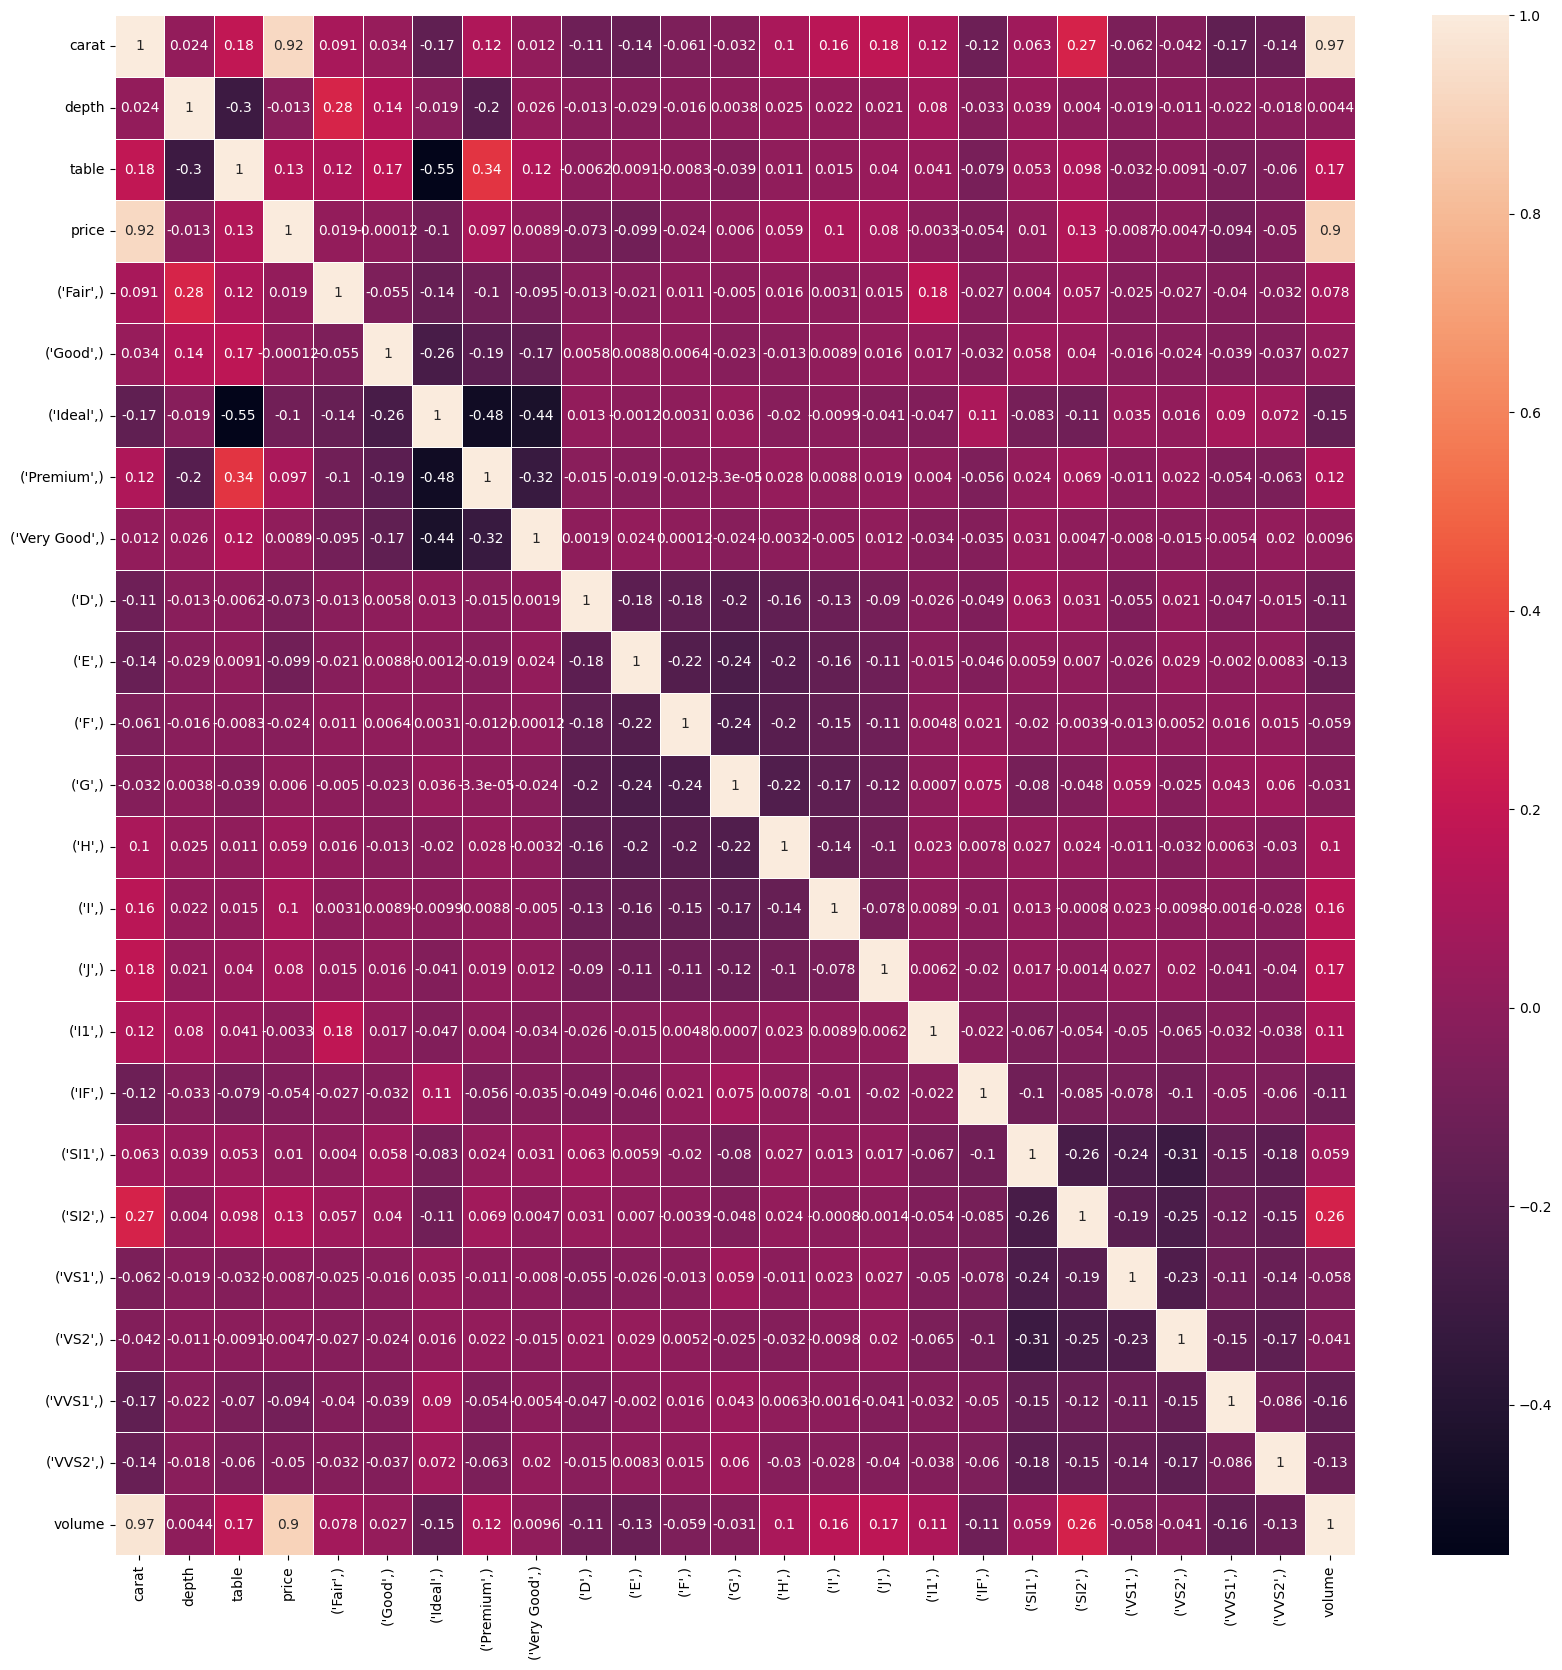

In [112]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(train_set_full3.corr(), annot=True, linewidths=.5, ax=ax)

<AxesSubplot: xlabel='volume', ylabel='price'>

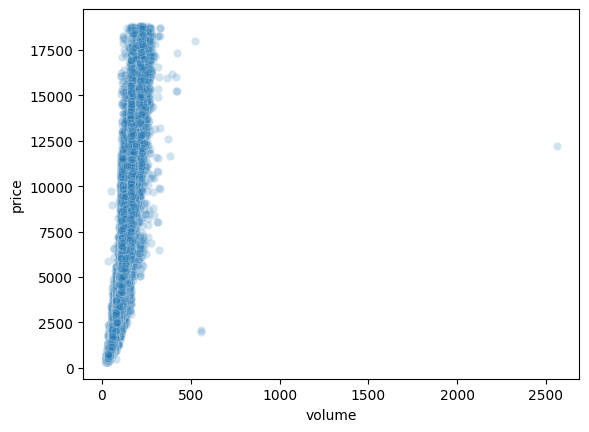

In [113]:
sns.scatterplot(data = train_set_full3, x = "volume", y = "price", alpha = 0.2)

<AxesSubplot: xlabel='carat', ylabel='price'>

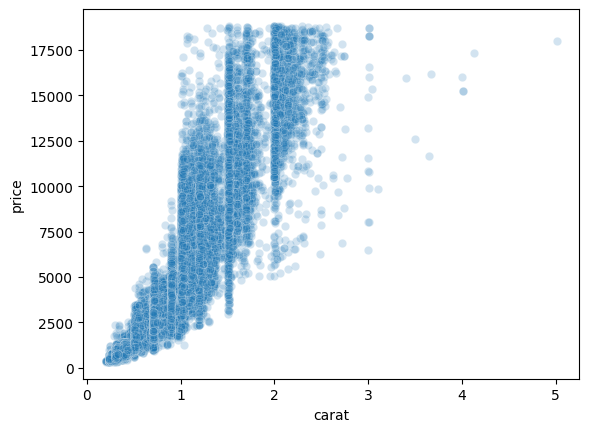

In [114]:
sns.scatterplot(data = train_set_full3, x = "carat",y = "price", alpha = 0.2)

<AxesSubplot: xlabel="('SI2',)", ylabel='price'>

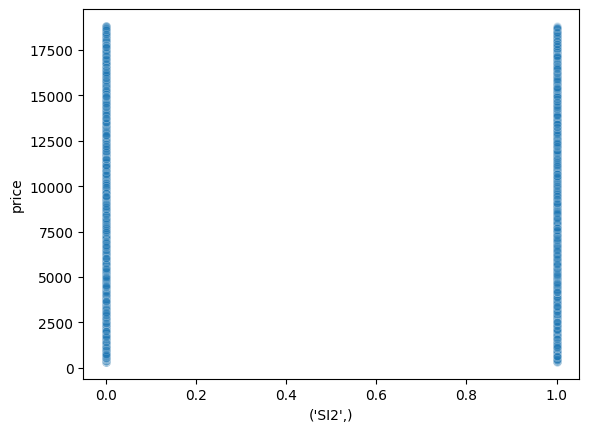

In [115]:
sns.scatterplot(data = train_set_full3, x = ('SI2',),y = "price", alpha = 0.2)

<AxesSubplot: xlabel='table', ylabel='Density'>

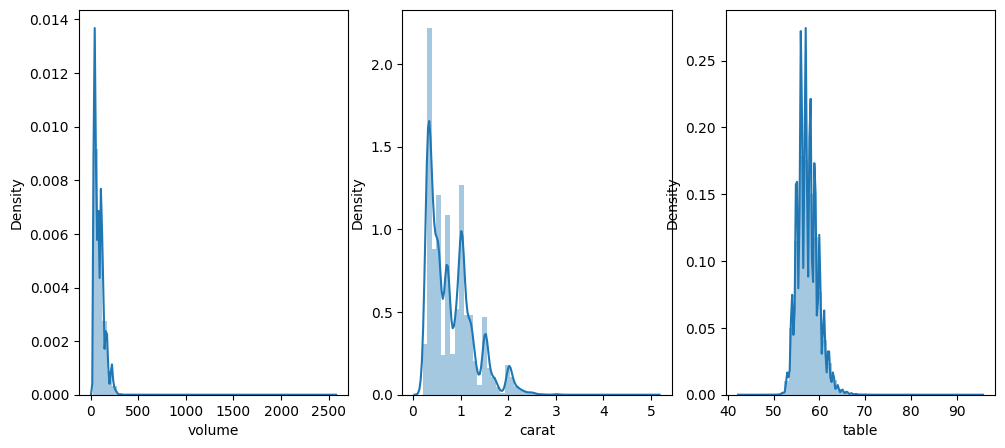

In [116]:
#now lets tend to the outliers
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(16,5))
plt.subplot(1,4,1)
sns.distplot(train_set_full3['volume'])
plt.subplot(1,4,2)
sns.distplot(train_set_full3['carat'])
plt.subplot(1,4,3)
sns.distplot(train_set_full3['table'])

In [117]:
print("Highest allowed for volume",str(train_set_full3['volume'].mean() + 3*train_set_full3['volume'].std()))

Highest allowed for volume 243.79170437145797


In [118]:
#train_set_full3
print("Highest allowed for carat",str(train_set_full3['carat'].mean() + 3*train_set_full3['carat'].std()))

Highest allowed for carat 2.217553266527341


In [119]:
print("Highest allowed for volume",str(train_set_full3['table'].mean() + 3*train_set_full3['table'].std()))
print("Lowest allowed for volume",str(train_set_full3['table'].mean() - 3*train_set_full3['table'].std()))

Highest allowed for volume 64.15812787625606
Lowest allowed for volume 50.75772236136999


In [120]:
train_set_full3 = train_set_full3[(train_set_full3['volume'] < 238) | (train_set_full3['carat'] <  2.2)]
train_set_full3 = train_set_full3[(train_set_full3['table'] < 64) | (train_set_full3['table'] > 50)]
train_set_full3.describe()

carat         depth         table         price       (Fair,)  \
count  42770.000000  42770.000000  42770.000000  42770.000000  42770.000000   
mean       0.783564     61.747101     57.452509   3829.609002      0.029624   
std        0.449339      1.431644      2.232155   3847.913078      0.169548   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    944.000000      0.000000   
50%        0.700000     61.800000     57.000000   2374.000000      0.000000   
75%        1.040000     62.500000     59.000000   5221.750000      0.000000   
max        2.320000     79.000000     95.000000  18818.000000      1.000000   

            (Good,)      (Ideal,)    (Premium,)  (Very Good,)          (D,)  \
count  42770.000000  42770.000000  42770.000000  42770.000000  42770.000000   
mean       0.090180      0.399743      0.255997      0.224456      0.126654   
std        0.286443      0.489851      0.436425      0.417229      0.332589   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      1.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

       ...          (J,)         (I1,)         (IF,)        (SI1,)  \
count  ...  42770.000000  42770.000000  42770.000000  42770.000000   
mean   ...      0.050947      0.013187      0.033692      0.242296   
std    ...      0.219892      0.114076      0.180437      0.428477   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.000000      0.000000   
max    ...      1.000000      1.000000      1.000000      1.000000   

             (SI2,)        (VS1,)        (VS2,)       (VVS1,)       (VVS2,)  \
count  42770.000000  42770.000000  42770.000000  42770.000000  42770.000000   
mean       0.168740      0.150994      0.228712      0.067898      0.094482   
std        0.374526      0.358047      0.420008      0.251574      0.292502   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

             volume  
count  42770.000000  
mean      85.093520  
std       49.913837  
min       21.138656  
25%       43.258930  
50%       76.277273  
75%      112.988386  
max     2560.398707  

[8 rows x 25 columns]

In [121]:
# train_set_full3 = train_set_full3.drop(
#     ['x', 'y', 'z', 'depth', 'Id'], axis=1, inplace=False)
# test_set_full3 = test_set_full3.drop(
#     ['x', 'y', 'z', 'depth', 'Id'], axis=1, inplace=False)

In [122]:
Y_train = train_set_full3['price'].values
X_train = train_set_full3.drop(['price'],axis = 1).values
X_test = test_set_full3.values

In [123]:
#normalizing data
minmaxScaler = MinMaxScaler().fit(X_train)
X_train_normalized = X_train
X_test_normalized = minmaxScaler.transform(X_test)

In [124]:
print(X_train_normalized)

[[  1.06        61.8         57.         ...   0.           0.
  117.65556   ]
 [  1.51        60.9         58.         ...   0.           1.
  164.643864  ]
 [  0.32        61.3         56.         ...   0.           0.
   35.295582  ]
 ...
 [  0.44        61.5         58.         ...   1.           0.
   48.53442   ]
 [  0.31        60.2         58.         ...   0.           0.
   34.27934   ]
 [  0.33        61.2         55.         ...   0.           0.
   36.57973067]]


In [125]:
#linear regression
LinearRegression = linear_model.LinearRegression()
LinearRegression.fit(X_train_normalized, Y_train)

LinearRegression()

In [126]:
LinearRegression.score(X_train_normalized, Y_train)

0.9162582863557382

In [127]:
pricing_predictions = LinearRegression.predict(X_train_normalized)
lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

1113.5022470912716


In [128]:
scores = cross_val_score(LinearRegression, X_train_normalized, Y_train, cv = 10)
rmse_cv = np.sqrt(scores)
rmse_cv

array([0.95808602, 0.95742348, 0.95571371, 0.95652793, 0.95746475,
       0.95474661, 0.95664429, 0.95827278, 0.95311803, 0.95947636])

In [129]:
#Random forest tree
Reg_forest = RandomForestRegressor()
Reg_forest.fit(X_train_normalized, Y_train)

RandomForestRegressor()

In [130]:
Reg_forest.score(X_train_normalized, Y_train)

0.9973870156125444

In [131]:
pricing_predictions = Reg_forest.predict(X_train_normalized)
lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

196.69285460976678


In [132]:
scores = cross_val_score(Reg_forest, X_train_normalized, Y_train, cv = 10)
rmse_cv = np.sqrt(scores)
rmse_cv

array([0.99021041, 0.99117268, 0.99044149, 0.99046067, 0.99085782,
       0.99041623, 0.99067744, 0.99115471, 0.99122486, 0.99048337])

In [133]:
#Decision Tree Regressor
Tree_Reg = DecisionTreeRegressor()
Tree_Reg.fit(X_train_normalized, Y_train)

DecisionTreeRegressor()

In [134]:
Tree_Reg.score(X_train_normalized, Y_train)

0.9999242802263854

In [135]:
pricing_predictions = Tree_Reg.predict(X_train_normalized)
lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

33.48303596294118


In [136]:
scores = cross_val_score(Tree_Reg, X_train_normalized, Y_train, cv = 10)
rmse_cv = np.sqrt(scores)
rmse_cv

array([0.98344359, 0.98423164, 0.98465521, 0.98369862, 0.98493389,
       0.9826424 , 0.98325859, 0.98432863, 0.9837815 , 0.98147022])

In [137]:
# Predicting the Test set results
predictions = Reg_forest.predict(X_test_normalized)

In [142]:
params = {
    "n_estimators": 1000,
    "max_depth": 7,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train_normalized, Y_train)

pricing_predictions = reg.predict(X_train_normalized)

lin_mse = mean_squared_error(pricing_predictions, Y_train)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

417.087480662015

In [144]:
predictions = reg.predict(X_test_normalized)

In [145]:
submission = test[["Id"]]

In [146]:
submission['price'] = predictions

In [147]:
submission.head()

Id       price
0   1   34.986046
1   2  235.717772
2   3 -177.971586
3   4  184.583252
4   5  187.215451

In [148]:
submission.to_csv("submission.csv", index=None)